In [1]:
#!pip3 install --upgrade pandas
import pandas as pd
import numpy as np
import re, os, json
from csv import writer
from os import listdir, walk
from os.path import isfile, join
from time import gmtime, strftime
from nltk.corpus import stopwords, wordnet

/Users/anhthu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/anhthu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Library loading
import nltk
from nltk.corpus import stopwords
import os
from os import listdir

## new libraries: sklearn and gensim: you need to install using analconda prompt or terminal as you installed instaloader.from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
## gensim
import gensim

In [3]:
## make a list for all text file on folder
new_list = []
for root, dirs, files in os.walk("/Users/anhthu/Library/CloudStorage/OneDrive-Personal/UNM/MSCBA/MGMT660_TextMining/lab/nike"):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), encoding='utf8') as f:
                text = f.readline()
                new_list.append(text)

In [4]:
## make df from text list
import pandas as pd
from pandas import DataFrame
df = DataFrame(new_list, columns = ['Text'])

In [5]:
## exporting df to CSV
df.to_csv("/Users/anhthu/Library/CloudStorage/OneDrive-Personal/UNM/MSCBA/MGMT660_TextMining/lab/nike_lab7.csv")

In [6]:
# remove http or https
df["link"] = df["Text"].apply(lambda s: " ".join(w for w in s.split() if w.startswith("http")))
df["AnalyzedTextWithoutHttp"] = df["Text"].apply(lambda s: " ".join(w for w in s.split() if not w.startswith("http")))

In [7]:
df.head(10)

,Text,link,AnalyzedTextWithoutHttp
0,Yesterday I found new purpose in tomorrow. Tod...,,Yesterday I found new purpose in tomorrow. Tod...
1,The Nike LunarGlide+ 4 Chicago edition. Built ...,,The Nike LunarGlide+ 4 Chicago edition. Built ...
2,Outside is where you find what's inside. #just...,,Outside is where you find what's inside. #just...
3,Morning runs. Lunch runs. After-work runs. Fiv...,,Morning runs. Lunch runs. After-work runs. Fiv...
4,Drying the court. #counts. The #sxsw 8-foot du...,,Drying the court. #counts. The #sxsw 8-foot du...
5,You don't get here by playing it safe. #Federer\n,,You don't get here by playing it safe. #Federer
6,What’s more terrifying? A multi-time champion ...,,What’s more terrifying? A multi-time champion ...
7,"25,000 strong, the Nike Women's Marathon is ge...",,"25,000 strong, the Nike Women's Marathon is ge..."
8,Never Done creating space ✨\n,,Never Done creating space ✨
9,"If you pull up, you better be laced up. Look ...",,"If you pull up, you better be laced up. Look n..."


In [8]:
# Remove hashtag
df["hashtag"] = df["AnalyzedTextWithoutHttp"].apply(lambda s: " ".join(w for w in s.split() if w.startswith("#")))
df["AnalyzedTextWithoutHttpHashtag"] = df["AnalyzedTextWithoutHttp"].apply(lambda s: " ".join(w for w in s.split() if not w.startswith("#")))


In [9]:
# Remove username
df["user_mentioned"] = df["AnalyzedTextWithoutHttpHashtag"].apply(lambda s: " ".join(w for w in s.split() if w.startswith("@")))
df["AnalyzedTextWithoutHttpHashtagUserName"] = df["AnalyzedTextWithoutHttpHashtag"].apply(lambda s: " ".join(w for w in s.split() if not w.startswith("@")))


In [10]:
# Remove non-alphabatic
df["AnalyzedTextWithoutHttpHashtagUserNameNonAlpha"] = df["AnalyzedTextWithoutHttpHashtagUserName"].apply(lambda s: " ".join(w for w in s.split() if w.isalpha()))


In [11]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df["AnalyzedText"] = df["AnalyzedTextWithoutHttpHashtagUserNameNonAlpha"].apply(lambda s: " ".join(w for w in s.split() if w.lower() not in stop_words))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anhthu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df.head(2)

,Text,link,AnalyzedTextWithoutHttp,hashtag,AnalyzedTextWithoutHttpHashtag,user_mentioned,AnalyzedTextWithoutHttpHashtagUserName,AnalyzedTextWithoutHttpHashtagUserNameNonAlpha,AnalyzedText
0,Yesterday I found new purpose in tomorrow. Tod...,,Yesterday I found new purpose in tomorrow. Tod...,,Yesterday I found new purpose in tomorrow. Tod...,,Yesterday I found new purpose in tomorrow. Tod...,Yesterday I found new purpose in,Yesterday found new purpose
1,The Nike LunarGlide+ 4 Chicago edition. Built ...,,The Nike LunarGlide+ 4 Chicago edition. Built ...,#nike #running #marathon,The Nike LunarGlide+ 4 Chicago edition. Built ...,,The Nike LunarGlide+ 4 Chicago edition. Built ...,The Nike Chicago Built to go the Designed in c...,Nike Chicago Built go Designed collaboration w...


In [13]:
# Convert to list
data = df.AnalyzedText.values.tolist()

In [14]:
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

In [15]:
# Remove  new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

In [16]:
## up to this point, we finished the data preprocessing. Now let's do the actual text analysis
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

In [17]:
data_words = list(sent_to_words(data))

In [18]:
## remember bigram and trigram? Let's check whether there is a differnce between usage of bigram vs trigram for text mining
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
# Phrases: Automatically detect common phrases – multi-word expressions / word n-grams – from a stream of sentences

# get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See bigram and trigram example
print(bigram_mod[bigram_mod[data_words[5]]])
print(trigram_mod[bigram_mod[data_words[5]]])

['get', 'playing']
['get', 'playing']


In [19]:
## you can do additional analysis

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# lemmatization: achieve the root forms
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags]) #token.lemma_: root of token; token.pos_: The simple part-of-speech tag ('NOUN', 'ADJ', 'VERB', 'ADV')
    return texts_out

In [20]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [21]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

print(data_words_bigrams[:10])

[['yesterday', 'found', 'new', 'purpose'], ['nike', 'chicago', 'built', 'go', 'designed', 'collaboration', 'windy', 'cody', 'available', 'select', 'chicago'], ['outside', 'find'], ['morning', 'lunch', 'tempo', 'long', 'distance', 'slow', 'hangover', 'cold', 'hot', 'stress', 'consistency', 'helps', 'lace', 'comfort', 'keeps', 'coming', 'back'], ['drying', 'dunk', 'contest', 'nike', 'colorado'], ['get', 'playing'], ['champion', 'done', 'brilliant', 'striker', 'whose', 'superior', 'skill', 'go'], ['nike', 'marathon', 'getting', 'ready', 'run', 'san', 'benefiting', 'leukemia', 'lymphoma', 'largest', 'marathon', 'world', 'runs', 'forward', 'give', 'follow', 'along', 'weekend', 'take', 'special', 'race', 'years', 'always'], ['never', 'done', 'creating', 'space'], ['pull', 'better', 'laced', 'look', 'new', 'basketball', 'crew', 'rocking', 'cut', 'cosmic', 'unity']]


In [22]:
from spacy.lang.en import English
import en_core_web_sm
nlp = en_core_web_sm.load()
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']) 
print(data_lemmatized[:3])

[['yesterday', 'find', 'new', 'purpose'], ['build', 'go', 'design', 'collaboration', 'windy', 'cody', 'available', 'select'], ['outside', 'find']]


In [23]:
##Create the Dictionary and Corpus needed for Topic Modeling
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:3])

[[(0, 1), (1, 1), (2, 1), (3, 1)], [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(0, 1), (12, 1)]]


In [24]:
from gensim.models import LdaModel, CoherenceModel

In [25]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [26]:
from pprint import pprint

In [27]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.028*"find" + 0.022*"way" + 0.019*"want" + 0.018*"mean" + 0.016*"team" + '
  '0.014*"game" + 0.014*"dream" + 0.014*"watch" + 0.013*"break" + '
  '0.013*"think"'),
 (1,
  '0.040*"take" + 0.024*"run" + 0.023*"first" + 0.021*"step" + 0.019*"come" + '
  '0.016*"stop" + 0.014*"start" + 0.014*"push" + 0.013*"next" + 0.013*"year"'),
 (2,
  '0.042*"get" + 0.029*"time" + 0.029*"know" + 0.026*"play" + 0.019*"see" + '
  '0.016*"day" + 0.016*"big" + 0.013*"share" + 0.012*"future" + '
  '0.011*"street"'),
 (3,
  '0.046*"never" + 0.031*"make" + 0.028*"world" + 0.027*"always" + '
  '0.017*"even" + 0.016*"do" + 0.016*"love" + 0.016*"give" + 0.015*"stay" + '
  '0.015*"well"'),
 (4,
  '0.025*"good" + 0.023*"feel" + 0.022*"thing" + 0.021*"look" + '
  '0.020*"athlete" + 0.019*"new" + 0.018*"nike" + 0.016*"go" + 0.016*"second" '
  '+ 0.016*"football"')]


In [28]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [29]:
lda_viz = gensimvis.prepare(topic_model= lda_model, corpus = corpus , dictionary = id2word)
lda_viz

/Users/anhthu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/anhthu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/anhthu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/anhthu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently instal

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.192345 -0.118030       1        1  22.728649
2      0.254884 -0.106953       2        1  22.197401
3     -0.059424 -0.103251       3        1  18.882096
4      0.012513  0.126227       4        1  18.410975
0     -0.015628  0.202007       5        1  17.780879, topic_info=          Term       Freq      Total Category  logprob  loglift
56       never  61.000000  61.000000  Default  30.0000  30.0000
41         get  65.000000  65.000000  Default  29.0000  29.0000
51        take  64.000000  64.000000  Default  28.0000  28.0000
111       time  45.000000  45.000000  Default  27.0000  27.0000
150       know  44.000000  44.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
1881      halo   6.999863   7.730745   Topic5  -5.1741   1.6277
302       game  17.546143  36.274960   Topic5  -4.2552   1.0008
60        crew   9.150633  13.330354   Topic5  -4.9062   1.3508
1          new  15.754058  49.357965   Topic5  -4.3629   0.5850
433   continue   8.907978  13.797039   Topic5  -4.9331   1.2895

[201 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
191       5  0.911271  achieve
392       2  0.912006      air
37        3  0.987045   always
325       4  0.981202  athlete
13        1  0.931963     back
...     ...       ...      ...
169       4  0.937405     work
53        3  0.975700    world
590       3  0.965255    worth
54        1  0.949393     year
296       2  0.913384    young

[183 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 5, 1])

In [30]:
## dominant topic
def format_topics_sentences(corpus, texts, ldamodel=None):
    data = []

    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: x[1], reverse=True)
        
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                data.append([int(topic_num), round(prop_topic, 4), topic_keywords])
            else:
                break

    sent_topics_df = (
        pd.DataFrame(data, columns=[
            'Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])
                .assign(Text= texts) # or use Text= pd.Series(text)
    )
        
    return sent_topics_df

In [31]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized)


In [32]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0.5937,"find, way, want, mean, team, game, dream, watc...","[yesterday, find, new, purpose]"
1,1,2,0.6730,"get, time, know, play, see, day, big, share, f...","[build, go, design, collaboration, windy, cody..."
2,2,1,0.3471,"take, run, first, step, come, stop, start, pus...","[outside, find]"
3,3,1,0.6754,"take, run, first, step, come, stop, start, pus...","[morning, lunch, long, distance, slow, hangove..."
4,4,4,0.5639,"good, feel, thing, look, athlete, new, nike, g...","[dry, dunk, contest]"
5,5,2,0.4028,"get, time, know, play, see, day, big, share, f...",[play]
6,6,1,0.5599,"take, run, first, step, come, stop, start, pus...","[champion, do, brilliant, striker, superior, s..."
7,7,1,0.6701,"take, run, first, step, come, stop, start, pus...","[get, ready, run, benefit, leukemia, lymphoma,..."
8,8,3,0.6379,"never, make, world, always, even, do, love, gi...","[never, do, create, space]"
9,9,0,0.6448,"find, way, want, mean, team, game, dream, watc...","[pull, well, laced, look, new, basketball, cre..."


In [33]:
##document count
df_dominant_topic['Dominant_Topic'].value_counts()

Dominant_Topic
1    413
2    262
3    250
4    231
0    205
Name: count, dtype: int64

In [34]:
import matplotlib.pyplot as plt

In [35]:
import matplotlib.colors as mcolors

In [36]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

/Users/anhthu/opt/anaconda3/lib/python3.9/site-packages/bokeh/core/property/primitive.py:37: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  bokeh_bool_types += (np.bool8,)
/Users/anhthu/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/anhthu/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1082 samples in 0.003s...
[t-SNE] Computed neighbors for 1082 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1082
[t-SNE] Computed conditional probabilities for sample 1082 / 1082
[t-SNE] Mean sigma: 0.001012
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.104439
[t-SNE] KL divergence after 1000 iterations: 0.372297


/Users/anhthu/opt/anaconda3/lib/python3.9/site-packages/bokeh/io/notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


Loading BokehJS ...

/Users/anhthu/opt/anaconda3/lib/python3.9/site-packages/bokeh/io/notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


/Users/anhthu/opt/anaconda3/lib/python3.9/site-packages/bokeh/io/notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


/Users/anhthu/opt/anaconda3/lib/python3.9/site-packages/bokeh/io/notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


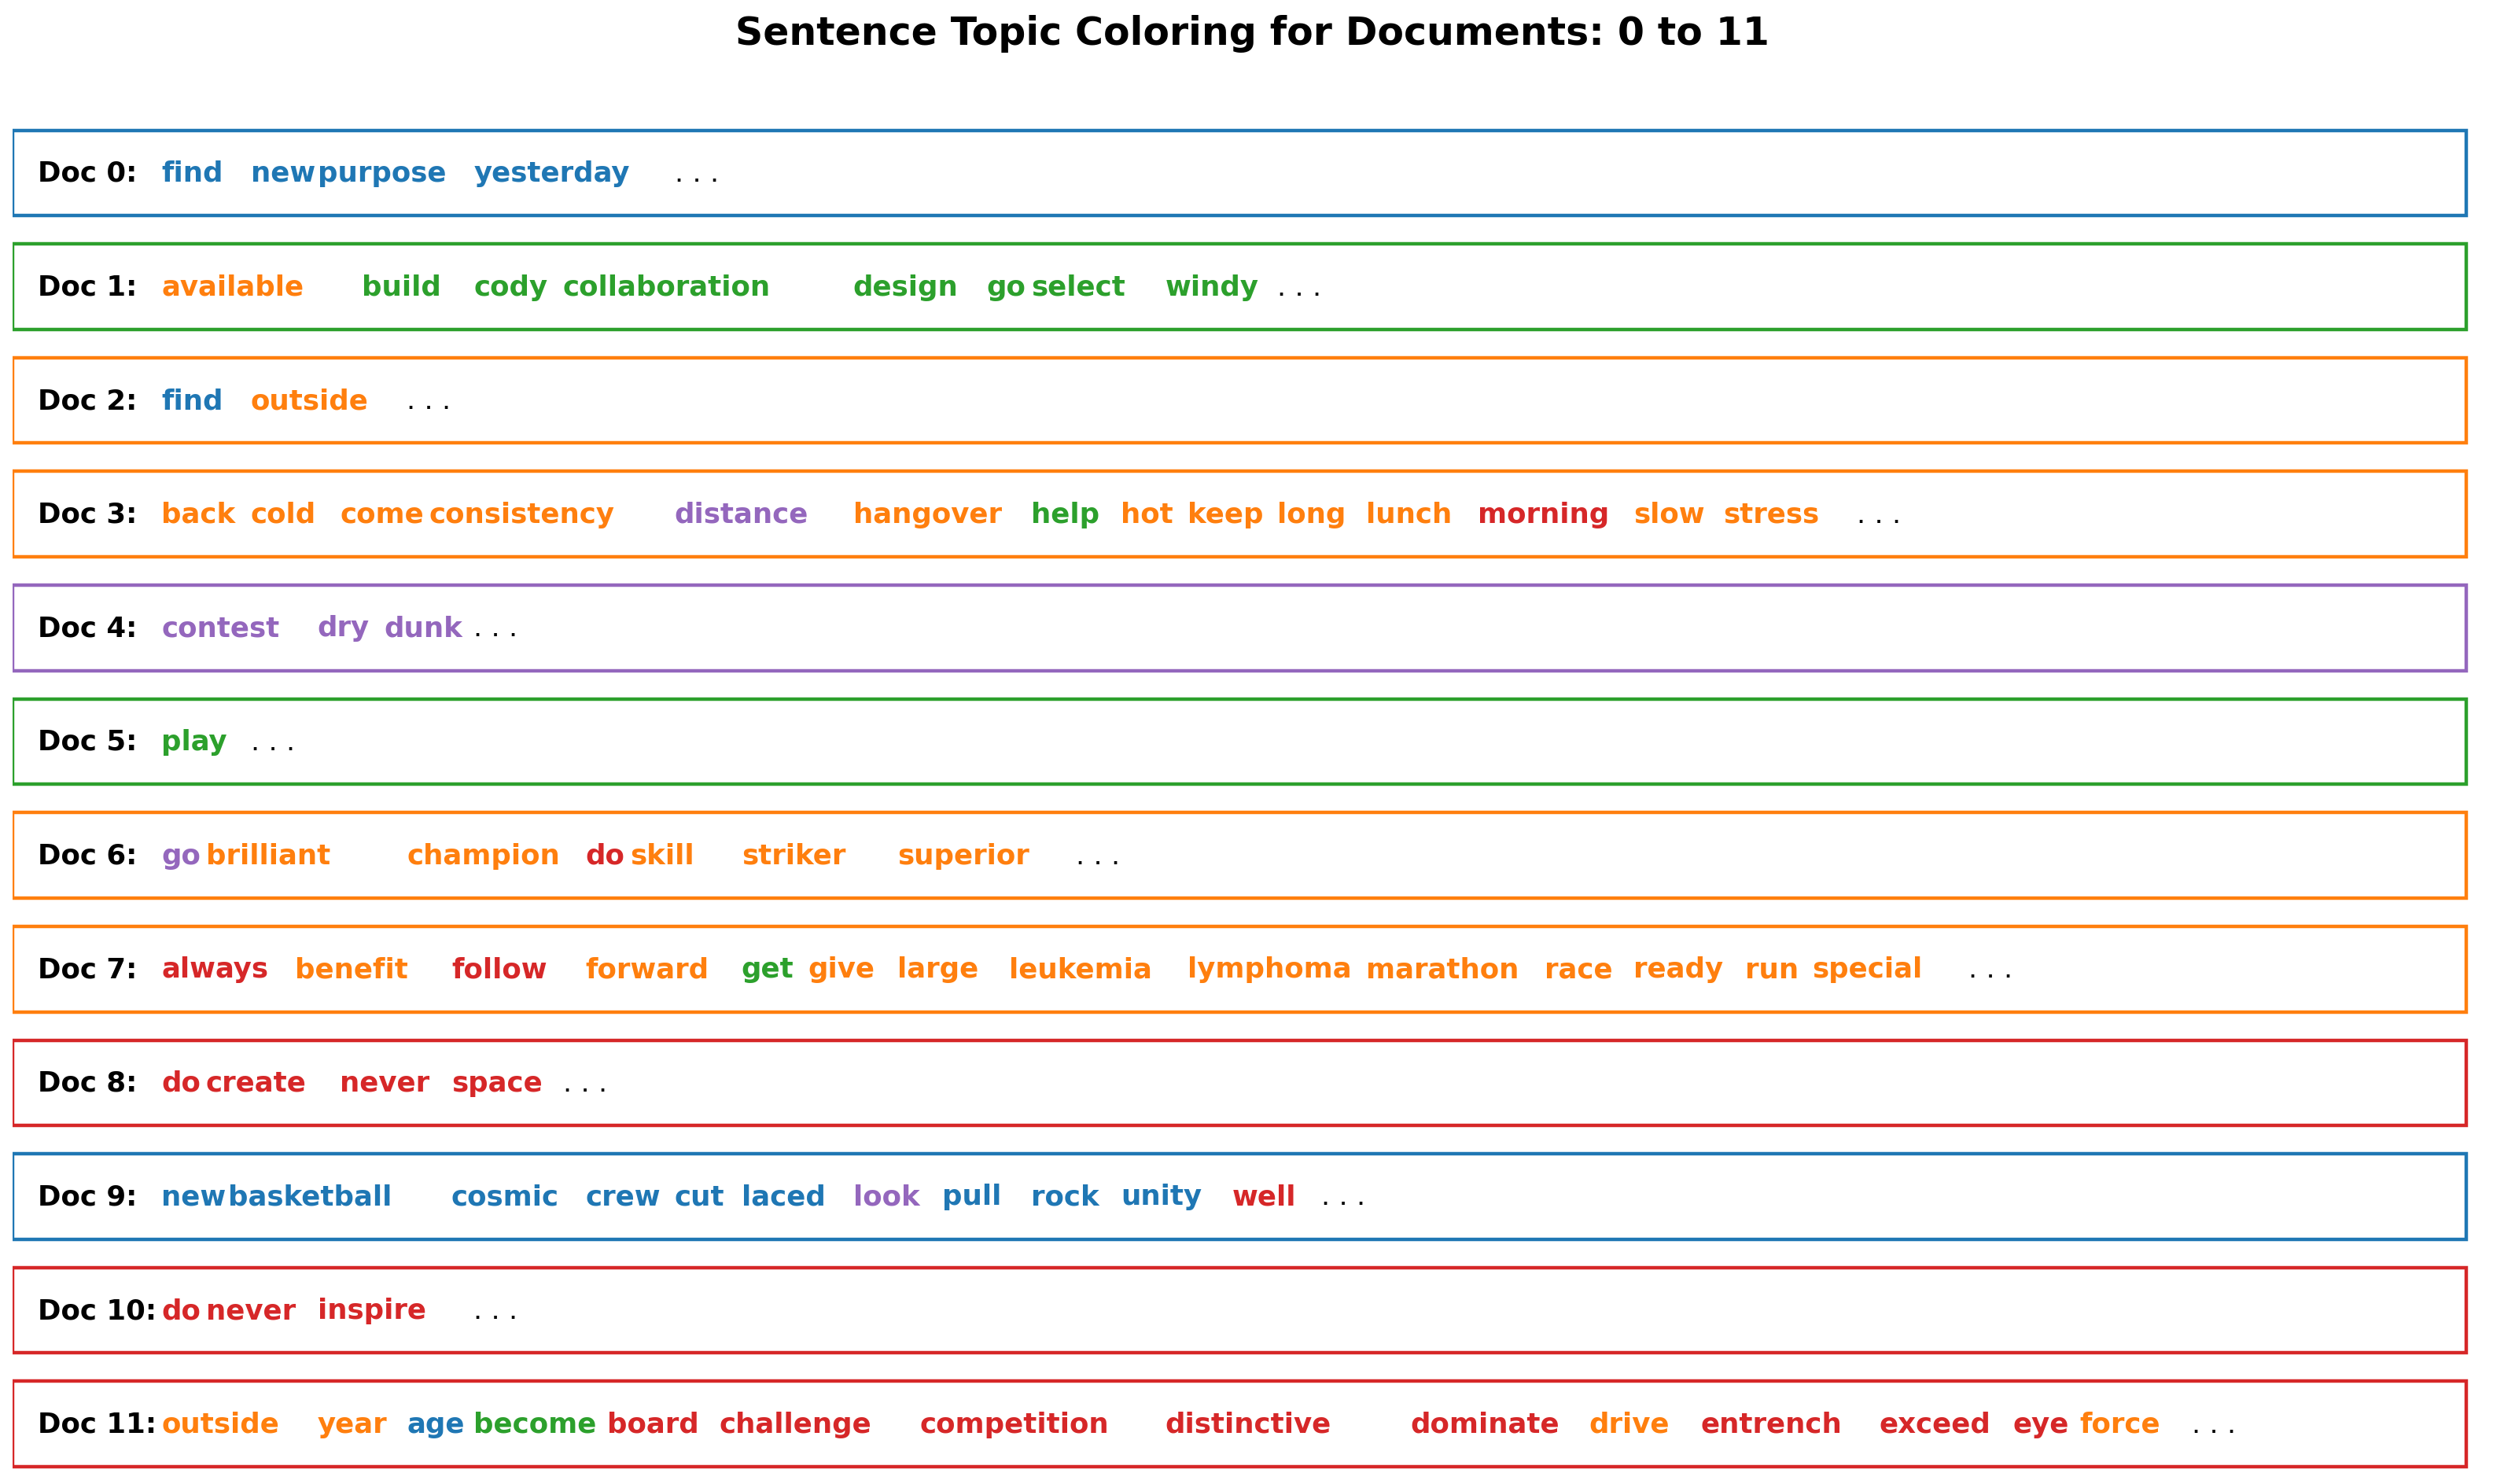

In [37]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()   

In [38]:
##sentiment analytsis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [39]:
def nltk_sentiment_pos(str):
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(str)
    return ss['pos']

def nltk_sentiment_neg(str):
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(str)
    return ss['neg']

def nltk_sentiment_neu(str):
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(str)
    return ss['neu']

def nltk_sentiment_compound(str):
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(str)
    return ss['compound']

In [40]:
df["positive"] = df["AnalyzedText"].apply(nltk_sentiment_pos)
df["negative"] = df["AnalyzedText"].apply(nltk_sentiment_neg)
df["neutral"] = df["AnalyzedText"].apply(nltk_sentiment_neu)
df["compound"] = df["AnalyzedText"].apply(nltk_sentiment_compound)

In [41]:
## merge df and dominant topics
dffinal = pd.concat([df, df_dominant_topic], axis=1, join = 'inner')

In [42]:
dffinal.to_csv("/Users/anhthu/Library/CloudStorage/OneDrive-Personal/UNM/MSCBA/MGMT660_TextMining/lab/nike_finalresult.csv", index = False)

In [43]:
## see each topic's sentiment
dffinal.groupby("Dominant_Topic")["positive"].mean()


Dominant_Topic
0    0.247776
1    0.158550
2    0.180126
3    0.191524
4    0.201645
Name: positive, dtype: float64

In [44]:
dffinal.groupby("Dominant_Topic")["negative"].mean()


Dominant_Topic
0    0.063244
1    0.041574
2    0.025882
3    0.045876
4    0.046506
Name: negative, dtype: float64

In [45]:
## it seems that topic 0 has the most positive sentiment and topic 1 has the most negative sentiment
##  let's check your result CSV file and LDAvis visualization results to see which words are included in topic 0 and topic 3. Please keep in mind that topic 0 is topic 1 in LDAvis. 



## Let's assume that you are trying to open a new business for your interested product/service or industry in the downtown ABQ area. What would be your suggestion? 